In [1]:
import sys

import matplotlib.pyplot as plt
import numpy as np
import psutil
from joblib import Parallel, delayed
from sympy import integrate, floor, Sum
from sympy.abc import k, x
from sympy.functions.combinatorial.factorials import binomial

In [2]:

def g_nx(n, x_input, x_floor=None):
    if x_floor is None:
        x_floor = floor(x_input)
    return Sum(
        ((-1) ** k) * binomial(n, k) * ((x_input - k) ** n),
        (k, 0, x_floor)
    ).doit()


def get_prob(n, r):
    sys.setrecursionlimit(1000000)
    r_inv = 1 / r
    a = n * (r ** (n - 1))
    b = integrate(
        g_nx(n - 1, r_inv * (1 - x), floor(r_inv)),
        (x, 0, 1 - floor(r_inv) * r)
    )
    c = integrate(
        g_nx(n - 1, r_inv * (1 - x), floor(r_inv) - 1),
        (x, 1 - floor(r_inv) * r, r)
    )
    d = r * g_nx(n - 1, r_inv - 1)
    return a * (b + c - d)

In [3]:
n_cpu = psutil.cpu_count()

In [4]:
x_coord = np.linspace(0.015, 1 / 3, n_cpu * 2)

exp = []
for number_of_pts in [4, 9, 16, 25, 36, 49, 64, 81, 100]:
    print(number_of_pts)
    probs = np.asarray(
        Parallel(n_jobs=n_cpu, verbose=9)(delayed(get_prob)(number_of_pts, r) for r in x_coord)
    )
    exp.append(probs)
exp = np.asarray(exp)
var = exp * (1 - exp)

np.savez('result2.npz', exp=exp, var=var)

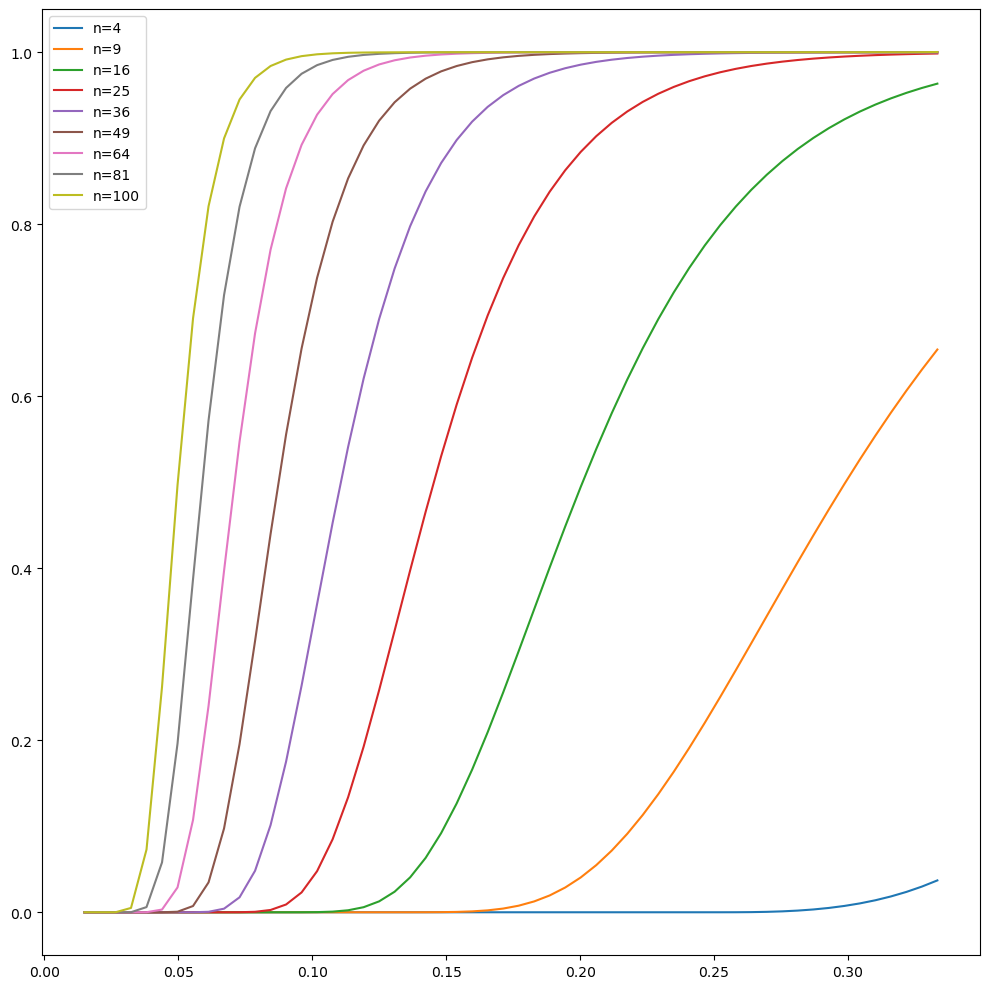

In [5]:
plt.figure(figsize=(10, 10))
for i, el in enumerate([4, 9, 16, 25, 36, 49, 64, 81, 100]):
    plt.plot(x_coord, exp[i], label=f'n={el}')
plt.tight_layout()
plt.legend()
plt.show()

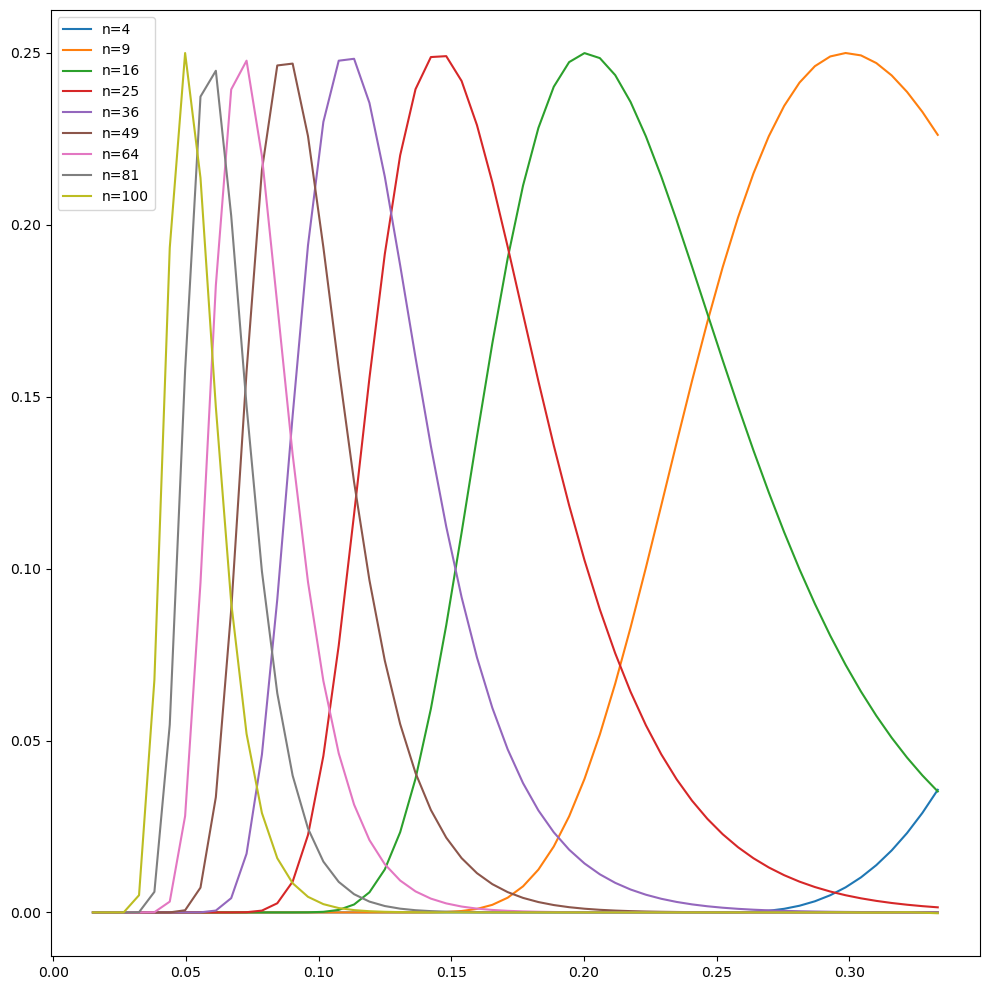

In [6]:
plt.figure(figsize=(10, 10))
for i, el in enumerate([4, 9, 16, 25, 36, 49, 64, 81, 100]):
    plt.plot(x_coord, var[i], label=f'n={el}')
plt.tight_layout()
plt.legend()
plt.show()

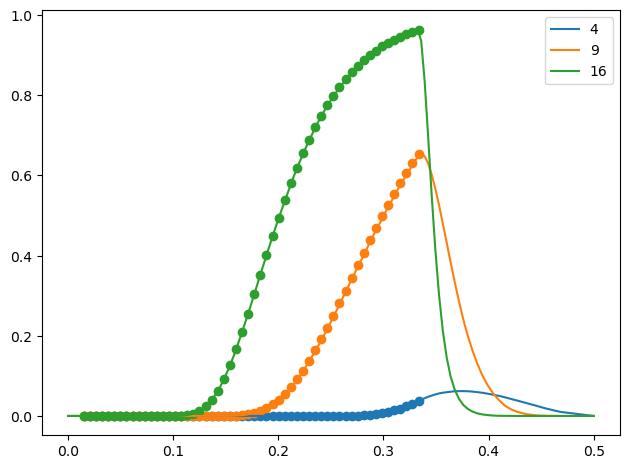

In [7]:
exp_result = np.load('result.npy')
exp_x_coord = np.arange(0, 2.02, 0.01)[:-1]
exp_x_coord2 = np.arcsin(exp_x_coord / 2) / np.pi
for idx, el in enumerate([4, 9, 16]):
    plt.plot(exp_x_coord2, exp_result[el - 4], label=el)
    plt.scatter(x_coord, exp[idx])
plt.legend()
plt.tight_layout()
plt.show()
plt.close()